<div style="text-align: center;">
    <h1>✨ <strong>Nom et Prénom : Laakel Gauzi Soumaya</strong> ✨</h1>
    <h3><strong>Module : Apprentissage automatique</strong></h3>
    <h4><em>MST IASD/S1 2023-2024</em></h4>
    <hr>
    <h2><strong>Exercice 1 (Classification) : Arbre de Décision CHAID pour le Dataset Titanic</strong></h2>
    <p><i>Le dataset Titanic contient des informations sur les passagers du Titanic, incluant des caractéristiques comme la classe, l'âge, le sexe et le tarif payé, permettant de prédire la survie. Il est couramment utilisé pour des exercices de classification et d'analyse exploratoire des données.</i></p>
</div>


## Étape 1: Importation des Bibliothèques et des Données

In [1]:
import seaborn as sns
import treePlotter as tpl
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Charger le dataset Titanic
data = sns.load_dataset('titanic')

## Étape 2: Exploration des données
**Phase de découverte et d'observation pour ainsi collecter de l'information sur les données en vue de prendre des décisions plus tard**
## 2.1 Description
Dans cette étape nous allons :
+ Consulter nos données
+ Identifier notre étiquette ou target
+ Décrire nos types de données

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Dans le Titanic Dataset, les variables d'entrée (features) et de sortie (target) sont les suivantes :
   #### Variables d'entrée (features)
+ **pclass :** Classe du billet (1, 2 ou 3) indiquant le type de cabine dans le Titanic.
+ **sex :** Sexe du passager (Male ou Female).
+ **age :** Âge du passager en années. Peut avoir des valeurs manquantes.
+ **sibsp :** Nombre de frères, sœurs, ou époux/épouses à bord du Titanic.
+ **parch :** Nombre de parents ou enfants à bord du Titanic.
+ **fare :** Tarif payé par le passager pour le billet du Titanic.
+ **embarked :** Port d'embarquement (C = Cherbourg, Q = Queenstown, S = Southampton).
+ **class :** Classe du passager, basée sur pclass, représentant la catégorie sociale.
+ **who :** Genre de passager (man, woman, child).
+ **adult_male :** Variable binaire indiquant si le passager est un homme adulte (True ou False).
+ **deck :** Pont sur lequel se trouvait le passager (A, B, C, etc.). Peut avoir des valeurs manquantes.
+ **embark_town :** Ville d'embarquement (Cherbourg, Queenstown, ou Southampton).
+ **alive :** Indique si le passager est vivant (Yes) ou non (No), similaire à survived.
+ **alone :** Variable binaire indiquant si le passager était seul (True) ou avec des membres de sa famille (False).
 #### Variable de sortie (target)
+ **survived :** C'est la classe cible, c'est-à-dire la variable que l'on cherche à prédire. Elle est binaire :
    + 1 : Le passager a survécu.
    + 0 : Le passager n'a pas survécu.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Le jeu de données contient **891 entrées et 15 colonnes**, avec des types variés : survived (int64, binaire) indique si le passager a survécu ou non, tandis que les autres colonnes incluent des types comme int64, float64, object, category, et bool. Certaines colonnes, telles que age, embarked, et deck, ont des valeurs manquantes.

## Les valeurs manquantes

In [5]:
data.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

+ age : 177 valeurs manquantes.
+ embarked : 2 valeurs manquantes.
+ deck : 688 valeurs manquantes.
+ embark_town : 2 valeurs manquantes.

Les autres colonnes n'ont pas de valeurs manquantes.

In [7]:
# Remplacer les valeurs manquantes par la moyenne pour les colonnes numériques
data['age'].fillna(data['age'].mean(), inplace=True)
data['fare'].fillna(data['fare'].mean(), inplace=True)

# Remplacer les valeurs manquantes par la mode pour les colonnes catégorielles
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)
data['embark_town'].fillna(data['embark_town'].mode()[0], inplace=True)

# Ajouter 'Unknown' aux catégories existantes
data['deck'] = data['deck'].cat.add_categories('Unknown')

# Remplacer les NaN de la colonne 'deck' par 'Unknown'
data['deck'].fillna('Unknown', inplace=True)


In [8]:
data.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

Toutes les colonnes sont sans valeurs manquantes.

## Les doublons dans le dataset

In [9]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

Il semble qu'il y ait un doublon à la ligne 886, où le résultat est True. Cela signifie que la ligne 886 est une répétition exacte d'une ligne précédente dans le DataFrame.

In [10]:
data.duplicated().sum()

107

In [11]:
# Supprime les doublons et garde la première occurrence
data.drop_duplicates(inplace=True)  

In [12]:
data.duplicated().sum()

0

In [13]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,0.411990,2.243622,29.846335,0.522959,0.415816,34.711740
std,0.492507,0.855056,13.723868,0.986231,0.836922,52.160151
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.109350
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


+ **survived :**

  + Moyenne = 0.41, cela indique qu'environ 41% des passagers ont survécu.
  + La médiane est 0, ce qui signifie que la majorité des passagers n'ont pas survécu.
  
+ **pclass :**

  + Moyenne = 2.24, ce qui montre que la plupart des passagers étaient en deuxième classe (pclass 2).
  + Les valeurs vont de 1 (première classe) à 3 (troisième classe), avec une prévalence pour les classes 2 et 3.
  
+ **age :**

  + La moyenne est de 29.85, et les valeurs vont de 0.42 à 80 ans. Cela indique qu'il y avait des passagers jeunes et plus âgés.
  + Il y a une légère concentration autour de la médiane de 29.7.
  
+ **sibsp (nombre de frères/sœurs et conjoints à bord) :**

  + La moyenne est 0.52, et la plupart des passagers n'avaient pas ou peu de membres de famille à bord. La valeur maximale est 8, ce qui indique quelques cas où des passagers avaient de nombreuses personnes avec eux.
  
+ **parch (nombre de parents/enfants à bord) :**

  + Moyenne = 0.42, ce qui montre que peu de passagers avaient des enfants ou des parents à bord.
  
+ **fare :**

  + Moyenne = 34.71, avec une large plage allant de 0 à 512.33, ce qui suggère qu'il y a des passagers avec des billets très bon marché et d'autres avec des billets plus chers.
  + L'écart-type élevé (52.16) montre une grande variation dans les prix des billets.

In [14]:
data[['survived', 'alive']].drop_duplicates()


,survived,alive
0,0,no
1,1,yes


In [15]:
data.drop('alive', axis=1, inplace=True)  # Supprimer la colonne 'alive'

In [16]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unknown,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Unknown,Southampton,True


In [17]:
data['survived'].value_counts()

survived
0    461
1    323
Name: count, dtype: int64

+ 0 (décédé) : 461 passagers
+ 1 (survécu) : 323 passagers

Cela signifie que sur les 784 passagers au total, environ 59% des passagers sont décédés (461 sur 784), tandis qu'environ 41% ont survécu (323 sur 784).

## 2.2 Visualisation

In [18]:
dataset_int = data.select_dtypes('int') # dataset contenant uniquement des données numéique (continues)
dataset_object = data.select_dtypes('object') # dataset contenant uniquement des données textuelles (discrètes)

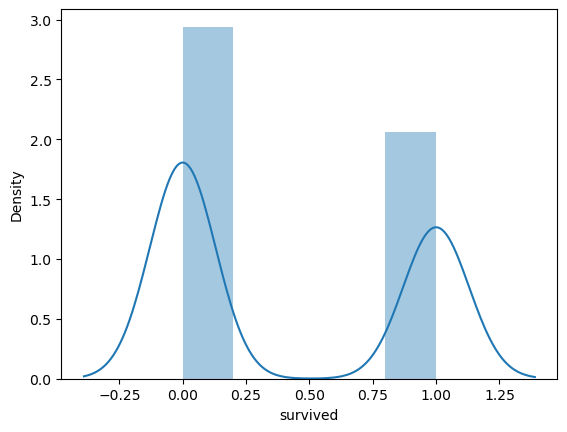

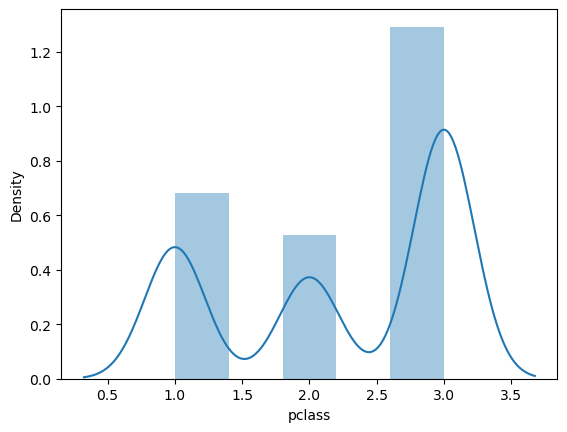

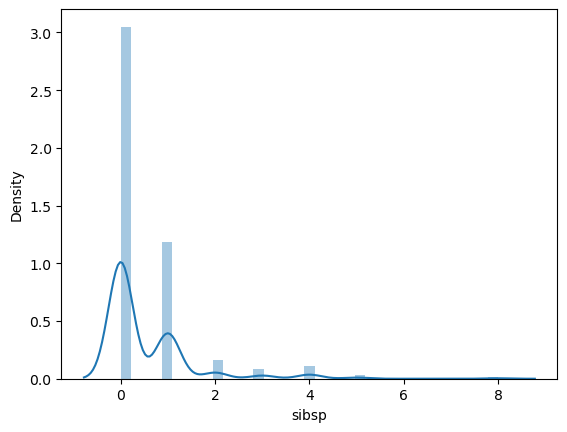

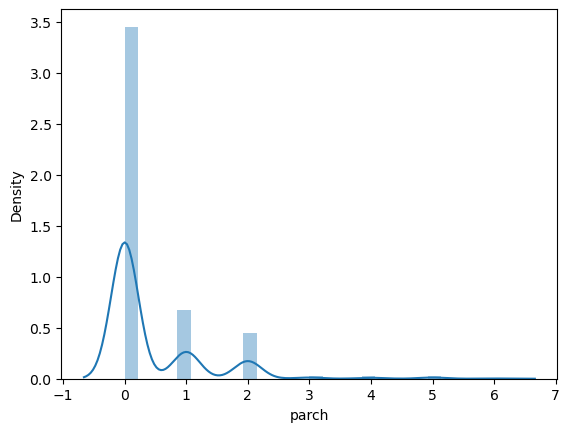

In [19]:
for col in dataset_int:
    plt.figure()
    sns.distplot(dataset_int[col])

In [20]:
for col in dataset_object:
    print(f'{col :-<30} {data[col].unique()}')

sex--------------------------- ['male' 'female']
embarked---------------------- ['S' 'C' 'Q']
who--------------------------- ['man' 'woman' 'child']
embark_town------------------- ['Southampton' 'Cherbourg' 'Queenstown']


In [21]:
data['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [22]:
data['deck'].unique()

['Unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

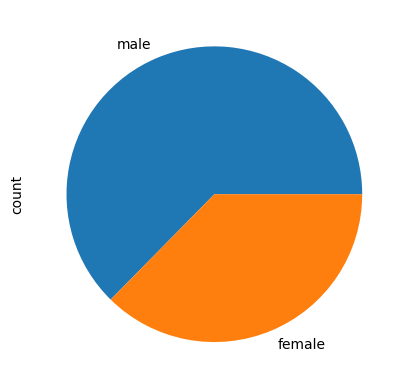

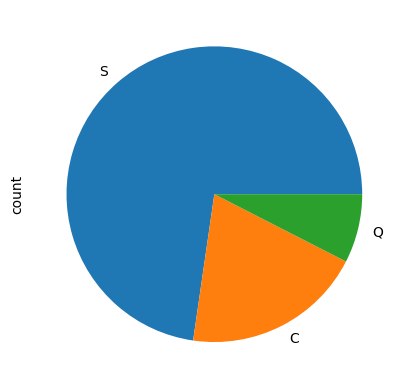

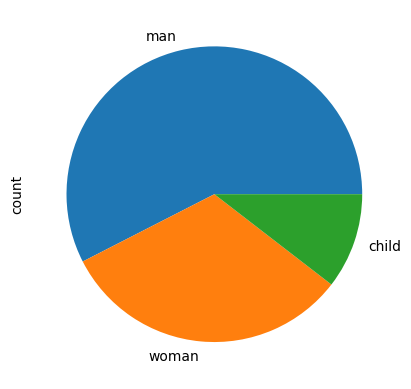

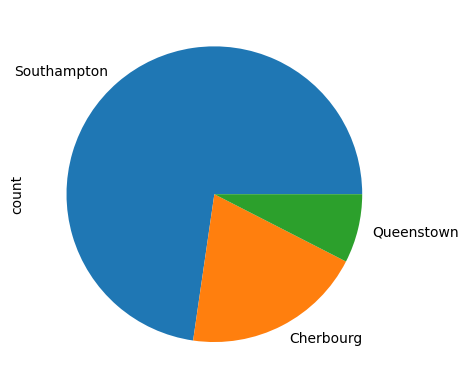

In [23]:
for col in dataset_object:
    plt.figure()
    data[col].value_counts().plot.pie()

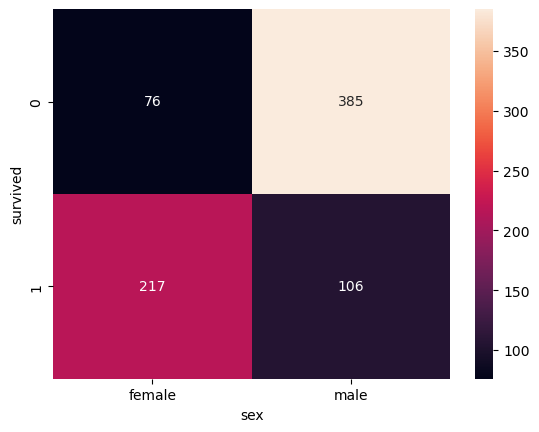

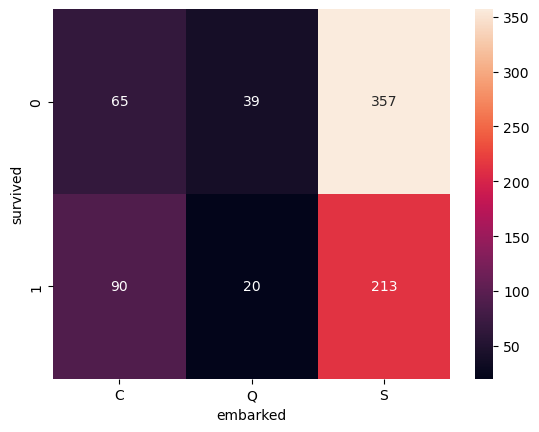

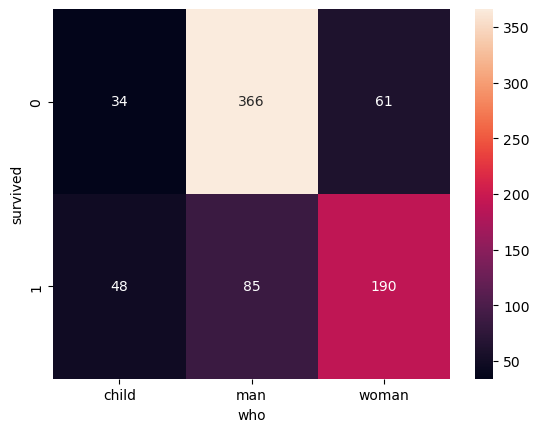

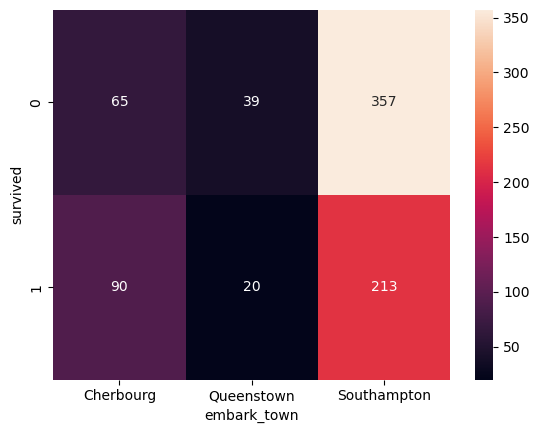

In [24]:
for col in dataset_object:
    plt.figure()
    sns.heatmap(pd.crosstab(data['survived'], data[col]), annot=True, fmt='d')

<Axes: >

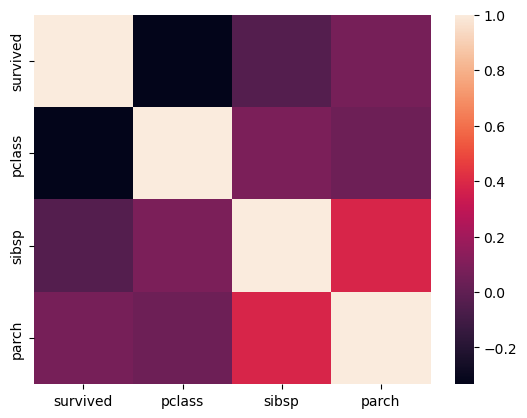

In [25]:
sns.heatmap(dataset_int.corr())

# 3- Préparer les données
**Phase de décision en vue de pré-traiter les données avant de les fournir au modèle pour son apprentissage**

## Encoder les données

In [26]:
# Garder les colonnes pertinentes 
data = data[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]
data['age'] = pd.cut(data['age'], bins=[0, 12, 18, 60, 100], labels=['child', 'teen', 'adult', 'senior'])
data['fare'] = pd.cut(data['fare'], bins=[0, 7.91, 14.45, 31, 512], labels=['low', 'mid', 'high', 'very_high'])
data = data.astype(str)

J'ai utilisé **la discrétisation** pour transformer des variables continues **(age et fare)** en **catégories**, car les algorithmes comme **CHAID** fonctionnent mieux avec des données **catégorielles.**

In [27]:
# Supprimer les lignes avec 'nan' dans la colonne 'fare'
data = data[data['fare'] != 'nan']

In [28]:
print(data.isnull().sum())  # Affiche le nombre de valeurs manquantes dans chaque colonne

survived    0
pclass      0
sex         0
age         0
fare        0
embarked    0
dtype: int64


In [29]:
data

,survived,pclass,sex,age,fare,embarked
0,0,3,male,adult,low,S
1,1,1,female,adult,very_high,C
2,1,3,female,adult,mid,S
3,1,1,female,adult,very_high,S
4,0,3,male,adult,mid,S
...,...,...,...,...,...,...
885,0,3,female,adult,high,Q
887,1,1,female,adult,high,S
888,0,3,female,adult,high,S
889,1,1,male,adult,high,C


# 4- Adapter le code ID3(PlayTennis).pdf pour utiliser le CHAID (Chi-squared Automatic Interaction Detection)

### Principe :

Le CHAID (Chi-squared Automatic Interaction Detection) fonctionne en divisant récursivement les données en sous-ensembles basés sur des tests de chi-carré pour déterminer la meilleure séparation des données selon une variable.

### 1- Fonction de division de l'ensemble de données
+ Cette fonction sépare l'ensemble de données selon la valeur de la caractéristique spécifiée. Cela est utilisé pour créer les sous-ensembles de données à chaque nœud de l'arbre.

In [30]:
def splitDataSet(dataSet, axis, value, target_col):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:  # Si la valeur de la caractéristique correspond à la valeur de séparation
            reducedFeatVec = featVec[:axis] + featVec[axis + 1:]  # Supprimer la colonne utilisée pour la séparation
            retDataSet.append(reducedFeatVec)
    return retDataSet

### 2- Fonction pour déterminer la classe majoritaire
+ Cette fonction retourne la classe majoritaire d'une liste d'exemples. Elle est utilisée lorsque l'arbre ne peut pas se diviser davantage, par exemple lorsque tous les exemples ont la même classe ou lorsqu'une condition d'arrêt est atteinte.

In [31]:
# Fonction pour obtenir la classe majoritaire
def majorityCnt(classList):
    class_count = Counter(classList)
    return class_count.most_common(1)[0][0]

### 3- Fonction pour choisir la meilleure caractéristique à diviser
+ Cette fonction utilise le test du chi carré pour déterminer la meilleure caractéristique à diviser. Le test du chi carré mesure l'indépendance entre deux variables. La fonction calcule le test du chi carré pour chaque caractéristique et sélectionne celle qui a la plus grande statistique de chi carré (c'est-à-dire la plus grande association avec la variable cible).
+ Une table de contingence est construite pour chaque caractéristique par rapport à la variable cible, et le test du chi carré est appliqué pour évaluer la relation.

In [32]:
def chooseBestFeatureToSplitCHAID(dataSet):
    numFeatures = len(dataSet[0]) - 1  # Exclure la colonne de l'étiquette
    bestFeat = -1
    maxChi2 = 0

    for i in range(numFeatures):
        feature_values = [example[i] for example in dataSet]
        label_values = [example[-1] for example in dataSet]
        contingency_table = pd.crosstab(pd.Series(feature_values), pd.Series(label_values))

        chi2, p, _, _ = chi2_contingency(contingency_table)

        if chi2 > maxChi2:  # Choisir la caractéristique avec le plus grand chi carré
            maxChi2 = chi2
            bestFeat = i

    return bestFeat if maxChi2 > 0 else None  # Si aucun chi carré significatif, retourner None


### 4- Calcul du gain d'information basé sur le test chi carré
+ Cette fonction calcule le gain d'information basé sur la p-value du test chi carré. Une p-value plus faible indique un meilleur pouvoir discriminant, et donc un meilleur gain d'information.

In [33]:
def calculateInfoGain(dataSet, feature_index):
    target_values = [example[-1] for example in dataSet]
    feature_values = [example[feature_index] for example in dataSet]
    contingency_table = pd.crosstab(pd.Series(feature_values), pd.Series(target_values))
    
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    gain = 1 - p_value
    return gain


### 5- Fonction de construction de l'arbre CHAID
+ Cette fonction construit l'arbre CHAID en :

  + Divisant l'ensemble de données selon la caractéristique avec le plus grand test de chi carré.
  + Arrêtant la division si toutes les instances ont la même classe, si la profondeur maximale est atteinte, ou si le nombre d'exemples dans un nœud est insuffisant.
+ Construction de l'arbre CHAID :
    + Contrôles d'arrêt :
       + Si toutes les classes dans un nœud sont identiques.
       + Si la profondeur maximale de l'arbre est atteinte.
       + Si le nombre d'échantillons est inférieur à **min_samples_split**.
       + Si le gain d'information calculé est inférieur à **min_gain**.
       + Si le nombre maximal de feuilles **(max_leaves)** est atteint.
    + Critères de contrôle :
      + **max_depth :** Limite la profondeur de l'arbre.
      + **min_samples_split :** Assure qu'il y a suffisamment d'échantillons pour diviser un nœud.
      + **min_gain :** Assure que la division améliore suffisamment la séparation.
      + **max_leaves :** Limite le nombre total de feuilles dans l'arbre.

In [34]:
def createTreeCHAID(dataSet, labels, target_col, depth=0, max_depth=5, min_samples_split=5, min_gain=0.01, max_leaves=20):
    
    classList = [example[-1] for example in dataSet]

    # Si tous les exemples ont la même classe cible, retourner cette classe
    if classList.count(classList[0]) == len(classList):
        return classList[0]

    # Si on a atteint la profondeur maximale ou qu'il n'y a plus de caractéristiques, arrêter
    if len(dataSet[0]) == 1 or depth >= max_depth:
        return majorityCnt(classList)

    # Si le dataset est trop petit pour continuer, arrêter
    if len(dataSet) < min_samples_split:
        return majorityCnt(classList)

    # Sélectionner la meilleure caractéristique à utiliser pour diviser les données
    bestFeat = chooseBestFeatureToSplitCHAID(dataSet)

    # Si aucune caractéristique n'est valide, retourner la classe majoritaire
    if bestFeat is None:
        return majorityCnt(classList)

    # Calculer le gain d'information pour la meilleure caractéristique
    gain = calculateInfoGain(dataSet, bestFeat)
    if gain < min_gain:
        return majorityCnt(classList)

    # Choisir l'étiquette de la meilleure caractéristique
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel: {}}

    # Créer une copie des labels et supprimer la caractéristique utilisée
    subLabels = labels[:]
    del(subLabels[bestFeat])  # Supprimer la caractéristique choisie

    # Récupérer les valeurs uniques de la caractéristique choisie
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)

    leaf_count = 0
    # Diviser les données en fonction des différentes valeurs de la caractéristique
    for value in uniqueVals:
        if leaf_count >= max_leaves:  # Limiter le nombre de feuilles
            break

        # Créer un sous-arbre pour chaque valeur unique
        subtree = createTreeCHAID(
            splitDataSet(dataSet, bestFeat, value, target_col), subLabels, target_col, depth + 1, max_depth, min_samples_split, min_gain, max_leaves
        )
        myTree[bestFeatLabel][value] = subtree
        leaf_count += 1

    return myTree


In [35]:
# Sélection des caractéristiques et de la cible
X = data.drop('survived', axis=1)  # Caractéristiques
y = data['survived']  # Variable cible

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir le jeu de données en liste de listes pour CHAID (avec les caractéristiques et la cible)
train_data = pd.concat([X_train, y_train], axis=1)  # Fusionner les caractéristiques et la cible
test_data = pd.concat([X_test, y_test], axis=1)  # Pour évaluer après

# Convertir en liste de listes
train_dataSet = train_data.values.tolist()
test_dataSet = test_data.values.tolist()

# Extraire les noms des caractéristiques (sans inclure la colonne 'survived')
labels = X.columns.tolist()

# Construire l'arbre de décision CHAID à partir du jeu de données d'entraînement
tree = createTreeCHAID(train_dataSet, labels.copy(), target_col=len(X.columns), depth=0, max_depth=5, min_samples_split=5, min_gain=0.01, max_leaves=20)

# Affichage de l'arbre
print("Arbre CHAID construit :")
print(tree)


Arbre CHAID construit :
{'sex': {'male': {'age': {'teen': {'fare': {'very_high': {'pclass': {'2': '0', '3': '0', '1': '1'}}, 'high': '0', 'mid': {'pclass': {'2': '0', '3': '0'}}, 'low': '0'}}, 'child': {'pclass': {'2': '1', '3': {'fare': {'very_high': '0', 'high': {'embarked': {'Q': '0', 'C': '0', 'S': '1'}}, 'mid': '1'}}, '1': '1'}}, 'adult': {'pclass': {'2': {'fare': {'very_high': '0', 'high': '0', 'mid': {'embarked': {'Q': '0', 'C': '1', 'S': '0'}}}}, '3': {'fare': {'very_high': '0', 'high': {'embarked': {'Q': '0', 'C': '1', 'S': '0'}}, 'mid': {'embarked': {'Q': '0', 'C': '0', 'S': '0'}}, 'low': {'embarked': {'Q': '0', 'C': '0', 'S': '0'}}}}, '1': {'fare': {'very_high': {'embarked': {'Q': '0', 'C': '0', 'S': '0'}}, 'high': {'embarked': {'C': '0', 'S': '1'}}, 'low': '0'}}}}, 'senior': {'fare': {'very_high': '0', 'high': '0', 'mid': '0', 'low': '0'}}}}, 'female': {'pclass': {'2': {'fare': {'very_high': '1', 'high': {'age': {'teen': '1', 'child': '1', 'adult': '1'}}, 'mid': {'embarked'

In [36]:
# Évaluer l'arbre sur le jeu de test
def classify(tree, labels, test_data):
    if not isinstance(tree, dict):
        return tree
    
    feature = list(tree.keys())[0]
    feature_index = labels.index(feature)
    feature_value = test_data[feature_index]
    
    if feature_value in tree[feature]:
        return classify(tree[feature][feature_value], labels, test_data)
    else:
        return majorityCnt([item[-1] for item in test_data])


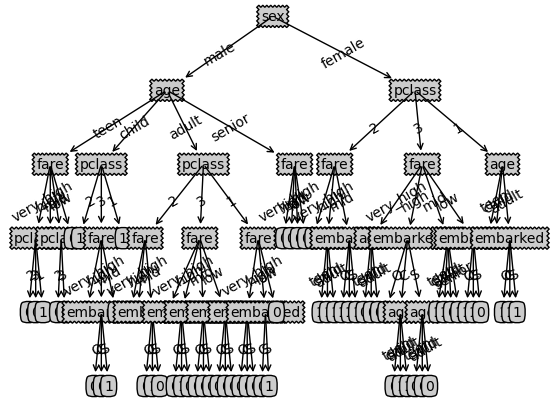

In [37]:
tpl.createPlot(tree)

## 6- Métriques de performance

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        78
           1       0.83      0.65      0.73        77

    accuracy                           0.76       155
   macro avg       0.77      0.76      0.76       155
weighted avg       0.77      0.76      0.76       155



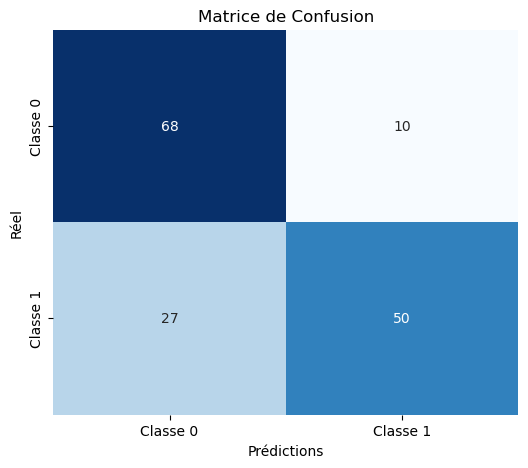

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = [classify(tree, labels, example) for example in X_test.values.tolist()]
print("Classification Report:")
print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Supposons que y_test et y_pred sont déjà définis
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme de graphique
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])

# Ajouter des labels et un titre
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.show()


### Rapport de classification :
+ **Précision :**
  + Classe 0 : 0.72
  + Classe 1 : 0.83 
  + La précision est plutôt élevée pour la classe 1 (les survivants) par rapport à la classe 0 (les non-survivants).
  
+ **Rappel :**
  + Classe 0 : 0.87
  + Classe 1 : 0.65 
  + Le modèle a une bonne capacité à identifier les non-survivants (classe 0), mais il a plus de difficulté à identifier les survivants (classe 1).
  
+ **F1-Score :**
  + Classe 0 : 0.79
  + Classe 1 : 0.73 
  + Le F1-score est plus élevé pour la classe 0, ce qui reflète la meilleure performance du modèle pour cette classe.

+ [[68 10]
+ [27 50]]

Cela signifie :

+ 68 vrais négatifs (prédictions correctes pour les non-survivants)
+ 10 faux positifs (le modèle a prédit que la personne survivait alors qu'elle ne survivait pas)
+ 27 faux négatifs (le modèle a prédit que la personne ne survivait pas alors qu'elle a survécu)
+ 50 vrais positifs (prédictions correctes pour les survivants)

### Pour les hyperparametres suivantes : **`depth=0`**, **`max_depth=3`**,**`min_samples_split=5`**, 
**`min_gain=0.001`**, **`max_leaves=10`**

In [39]:
# Construire l'arbre de décision CHAID à partir du jeu de données d'entraînement
tree2 = createTreeCHAID(train_dataSet, labels.copy(), target_col=len(X.columns), depth=0, max_depth=3, min_samples_split=5, min_gain=0.001, max_leaves=10)

# Affichage de l'arbre
print("Arbre CHAID construit :")
print(tree)


Arbre CHAID construit :
{'sex': {'male': {'age': {'teen': {'fare': {'very_high': {'pclass': {'2': '0', '3': '0', '1': '1'}}, 'high': '0', 'mid': {'pclass': {'2': '0', '3': '0'}}, 'low': '0'}}, 'child': {'pclass': {'2': '1', '3': {'fare': {'very_high': '0', 'high': {'embarked': {'Q': '0', 'C': '0', 'S': '1'}}, 'mid': '1'}}, '1': '1'}}, 'adult': {'pclass': {'2': {'fare': {'very_high': '0', 'high': '0', 'mid': {'embarked': {'Q': '0', 'C': '1', 'S': '0'}}}}, '3': {'fare': {'very_high': '0', 'high': {'embarked': {'Q': '0', 'C': '1', 'S': '0'}}, 'mid': {'embarked': {'Q': '0', 'C': '0', 'S': '0'}}, 'low': {'embarked': {'Q': '0', 'C': '0', 'S': '0'}}}}, '1': {'fare': {'very_high': {'embarked': {'Q': '0', 'C': '0', 'S': '0'}}, 'high': {'embarked': {'C': '0', 'S': '1'}}, 'low': '0'}}}}, 'senior': {'fare': {'very_high': '0', 'high': '0', 'mid': '0', 'low': '0'}}}}, 'female': {'pclass': {'2': {'fare': {'very_high': '1', 'high': {'age': {'teen': '1', 'child': '1', 'adult': '1'}}, 'mid': {'embarked'

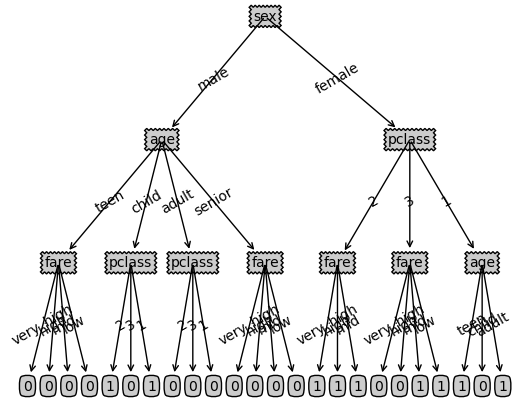

In [40]:
tpl.createPlot(tree2)

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.87      0.77        78
           1       0.82      0.61      0.70        77

    accuracy                           0.74       155
   macro avg       0.76      0.74      0.74       155
weighted avg       0.76      0.74      0.74       155



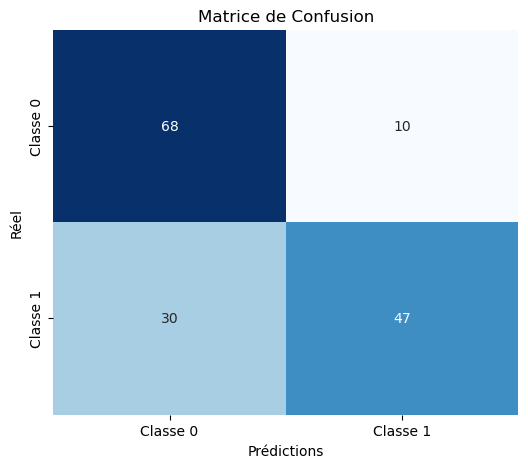

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = [classify(tree2, labels, example) for example in X_test.values.tolist()]
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Supposons que y_test et y_pred sont déjà définis
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme de graphique
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])

# Ajouter des labels et un titre
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.show()

+ **Précision**
  + Classe 0 : Précision = 0.69 (69%) , Cela signifie que 69% des prédictions faites pour la classe 0 étaient correctes.
  + Classe 1 : Précision = 0.82 (82%) , Cela signifie que 82% des prédictions faites pour la classe 1 étaient correctes.
+ **Rappel**
  + Classe 0 : Rappel = 0.87 (87%) , Cela signifie que 87% des éléments de la classe 0 ont été correctement identifiés par le modèle.
  + Classe 1 : Rappel = 0.61 (61%) , Cela signifie que seulement 61% des éléments de la classe 1 ont été correctement identifiés par le modèle.
+ **F1-Score**
  + Classe 0 : F1-score = 0.77 (77%) , Le modèle a un bon compromis entre précision et rappel pour la classe 0.
  + Classe 1 : F1-score = 0.70 (70%) , Le modèle a un compromis moins favorable pour la classe 1, avec un rappel relativement faible par rapport à la précision.
  
## Matrice de confusion  

+ [[68 10]
+ [30 47]]

+ 8 (Vrai Positifs pour la classe 0) : Le modèle a correctement classé 68 instances de la classe 0 comme étant de classe 0.
+ 10 (Faux Négatifs pour la classe 0) : Le modèle a prédit que 10 instances de la classe 0 étaient de classe 1.
+ 30 (Faux Positifs pour la classe 1) : Le modèle a prédit que 30 instances de la classe 1 étaient de classe 0.
+ 47 (Vrai Positifs pour la classe 1) : Le modèle a correctement classé 47 instances de la classe 1 comme étant de classe 1.


## Comparaison des modèles avec différents hyperparamètres

| Hyperparamètres                                         | Précision (Classe 0) | Rappel (Classe 0) | F1-score (Classe 0) | Précision (Classe 1) | Rappel (Classe 1) | F1-score (Classe 1) |
|---------------------------------------------------------|----------------------|-------------------|---------------------|----------------------|-------------------|---------------------|
| **depth=0, max_depth=5, min_samples_split=5, min_gain=0.01, max_leaves=20** | 0.72                 | 0.87              | 0.79                | 0.83                 | 0.65              | 0.73                |
| **depth=0, max_depth=3, min_samples_split=5, min_gain=0.001, max_leaves=10** | 0.69                 | 0.85              | 0.76                | 0.80                 | 0.60              | 0.69                |

### Conclusion :

- Le premier modèle (**depth=0, max_depth=5, min_samples_split=5, min_gain=0.01, max_leaves=20**) montre de meilleures performances pour la **classe 1** avec une **précision** de **0.83** et un **F1-score** de **0.73**, bien que son **rappel pour la classe 1** soit un peu plus faible (0.65).
- Le deuxième modèle (**depth=0, max_depth=3, min_samples_split=5, min_gain=0.001, max_leaves=10**) obtient de bons résultats pour la **classe 0**, avec une **précision** de **0.69** et un **rappel** de **0.85**. Cependant, son **F1-score pour la classe 1** est plus faible (0.69) que celui du premier modèle.

### Conclusion finale :
Le **premier modèle** (avec des hyperparamètres **max_depth=5**, **min_gain=0.01**, **max_leaves=20**) semble être le meilleur choix global, car il a un meilleur **F1-score** pour la classe 1 (0.73) et un bon compromis entre précision et rappel pour les deux classes.
